In [198]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.utils.data as data
import torch.nn.functional as F

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset




In [4]:
torch.cuda.is_available()

True

In [244]:
df = pd.read_excel("Demographic_List.xlsx")
X = np.load('samples_correlation.npy')

c:\Users\jimmy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Condition', ylabel='count'>

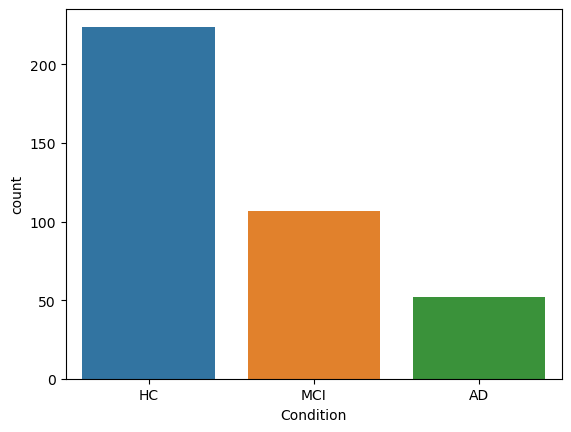

In [245]:
sns.countplot(df["Condition"])

In [246]:
# Binary enconding 
Y = df["Condition"].to_numpy()

l_encoder = LabelEncoder()
i_encoded = l_encoder.fit_transform(Y)
print(i_encoded)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 0 0 0 0 2 2 2 2 0 0 0 0 0 0 2 2 0 0 2 2 0 0 0 0 2 2 2 2 0
 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 0 2 2 2 2 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 1 1 1 1 2 2
 1 1 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 2 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [247]:
# Onehot enconding 
o_encoder = OneHotEncoder(sparse=False)
i_encoded = i_encoded.reshape(len(i_encoded), 1)
o_encoded = o_encoder.fit_transform(i_encoded)
print(o_encoded)

Y = o_encoded

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [248]:
X = Variable(torch.from_numpy(X.astype(np.float32)), requires_grad=False)
Y = Variable(torch.from_numpy(Y.astype(np.float32)), requires_grad=False)

In [249]:
X_train, X_test, y_train, y_test = train_test_split(   
     X, Y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(   
     X_train, y_train, test_size=0.1, random_state=42)

In [250]:
tags_train = l_encoder.inverse_transform(o_encoder.inverse_transform(y_train))
tags_test = l_encoder.inverse_transform(o_encoder.inverse_transform(y_test))

c:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\jimmy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jimmy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


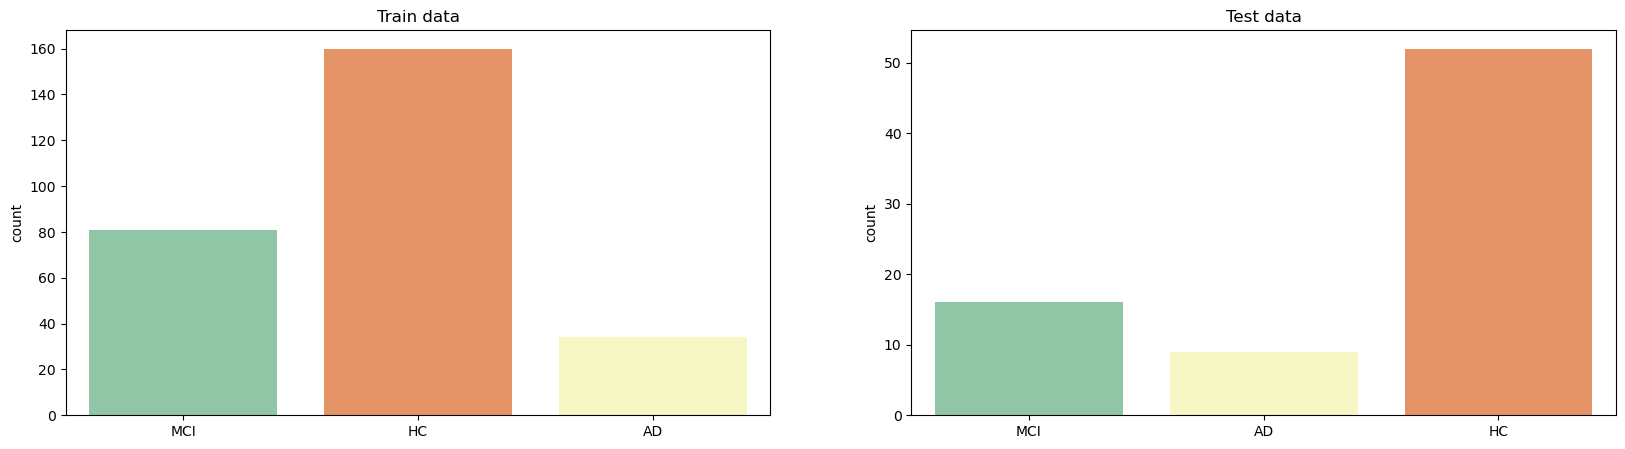

In [251]:
colors = sns.color_palette('Spectral', 3)
palette = {mode: color for mode, color in zip(["HC", "AD", "MCI"], colors)}

fig, ax = plt.subplots(1,2,figsize=(20,5))


sns.countplot(tags_train, ax=ax[0], palette=palette)
ax[0].set_title("Train data")

sns.countplot(tags_test, ax=ax[1], palette=palette);
ax[1].set_title("Test data");

In [252]:
data_dist = {"train" : len(X_train), "test" : len(X_test), "val" : len(X_val)}
data_dist

{'train': 275, 'test': 77, 'val': 31}

In [253]:
from torchsummary import summary

In [301]:
# Network Initialization 

model = nn.Sequential(
          nn.Conv2d(1,16,3),
          nn.Conv2d(16,16,3),
          nn.MaxPool2d(2),
          nn.Dropout(),
          nn.Conv2d(16,32,3),
          nn.Conv2d(32,32,3),
          nn.MaxPool2d(3),
          nn.Dropout(),
          nn.Flatten(start_dim=0),
          nn.Linear(32, 160),
          nn.Dropout(),
          nn.Linear(160, 3)
        )
model.to("cuda")

#summary(model, (1,20,20))

Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.5, inplace=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (6): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.5, inplace=False)
  (8): Flatten(start_dim=0, end_dim=-1)
  (9): Linear(in_features=32, out_features=160, bias=True)
  (10): Dropout(p=0.5, inplace=False)
  (11): Linear(in_features=160, out_features=3, bias=True)
)

In [302]:
train_ds = torch.utils.data.TensorDataset(X_train, y_train)
validation_ds = torch.utils.data.TensorDataset(X_val, y_val)


train_ds_loader = torch.utils.data.DataLoader(train_ds,shuffle=True)
val_ds_loader = torch.utils.data.DataLoader(validation_ds,batch_size=32,shuffle=True)

In [311]:
import torch.optim as optim

loss_fn=nn.BCELoss()
optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

In [313]:
num_epoch = 30 
train_losses=[]
valid_losses=[]

for epoch in range(1,num_epoch+1):
  train_loss=0.0
  valid_loss=0.0

  model.train()
  for img,lbl in train_ds_loader:
    img=img.cuda()
    lbl=lbl.cuda()

    optimizer.zero_grad()
    print(img.shape, lbl.shape)
    predict=model(img)
    loss=loss_fn(predict,lbl.flatten())
    loss.backward()
    optimizer.step()
    train_loss+=loss.item()*img.size(0)

  model.eval()
  for img,lbl in val_ds_loader:
    img=img.cuda()
    lbl=lbl.cuda()

    predict=model(img)
    loss=loss_fn(predict,lbl.flatten())

    valid_loss+=loss.item()*img.size(0)

  train_loss=train_loss/len(train_ds_loader.sampler) 
  valid_loss=valid_loss/len(val_ds_loader.sampler)

  train_losses.append(train_loss)
  valid_losses.append(valid_loss)

  print('Epoch:{} Train Loss:{:.4f} valid Losss:{:.4f}'.format(epoch,train_loss,valid_loss))    

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.